In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import accuracy_score
from tensorflow.keras.metrics import MeanSquaredError
from tensorflow.keras.losses import MeanAbsolutePercentageError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score

In [14]:
file_path = r"G:\Meu Drive\MESTRADO - MLOG\Projeto EV-Explore Ambev\TESTE_MAP_MATCHING_25_04\DATA_30_08_2024.xlsx"
data = pd.read_excel(file_path)

In [15]:
data

,ID_Rota,Energy_Estimated(%),Distance_Traveled(km),Avg_Temperature(C),Air_Humidity(%),Dist_Cluster_Clients(km),Route_Time(h),Total_Weighted_Mass(ton),Stdv_Altitudes(m),Wind_Speed(m/s),Avg_Speed(m/s),Number_Deliveries,Rain(mm),Max_Temp(C),Real_Energy_Expenditure(%)
0,20230901_RHQ2H04,41.716498,40.4,22.144429,52.796897,14.067360,3.185833,8.094501,7.352432,1.495487,3.524209,10,0.000000,27.5,41.2
1,20230902_RHS6B08,47.357887,49.6,22.191493,67.361194,7.806090,2.211111,9.206331,8.139739,2.044776,6.244209,8,0.000000,29.6,41.6
2,20230902_RHS6F90,54.828160,50.1,23.431280,62.676540,15.033330,3.123611,8.473027,20.839832,2.096801,4.455477,13,0.000000,29.6,46.4
3,20230902_RHT4G96,45.270473,54.3,19.594087,76.893316,19.882506,3.283333,7.848595,10.572484,1.692545,4.597407,9,0.000000,24.0,38.0
4,20230904_RHQ2H05,70.687503,57.8,27.653575,51.407254,18.174622,3.598056,9.276940,21.626044,3.153472,4.485942,11,0.000000,30.9,52.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,20240215_RHS6B06,44.577909,41.9,20.597115,88.774038,1.555601,2.258611,9.974098,16.337546,2.152644,5.198889,8,0.083173,22.3,36.8
173,20240220_RHS6F91,44.204194,51.8,21.943542,83.979167,12.778484,2.440278,9.663950,7.199588,1.208125,5.905980,14,0.120833,23.8,37.2
174,20240222_RHQ2H03,51.895367,58.9,24.058857,73.000000,11.092253,2.813611,8.282822,23.873651,1.963810,5.817566,12,0.000000,29.0,53.2
175,20240226_RHS6F92,59.709741,54.6,23.718381,75.708263,8.025749,3.442500,10.503930,8.306538,1.892749,4.403178,8,0.000000,26.5,44.4


In [16]:
X = data[['Energy_Estimated(%)']]
y = data['Real_Energy_Expenditure(%)']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
model = Sequential([
    Input(shape=(1,)),
    Dense(64, activation='relu'),  
    Dense(128, activation='relu'),                    
    Dense(64, activation='relu'),                    
    Dense(1, activation='linear')                  
])

In [25]:
learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss=MeanAbsolutePercentageError())

In [26]:
history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=1) 

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 81.1883
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 33.7936 
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.5932 
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.6845 
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.9003
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.2875 
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.4421 
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.9611 
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6634 
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.3555
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.4740  
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.2153 
Epoch 13/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.9923 
Epoch 14/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.5711  
Epoch 15/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.1914 
Epoch 16

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.8024 
Epoch 83/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.8753  
Epoch 84/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8865 
Epoch 85/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.8006  
Epoch 86/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6472 
Epoch 87/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.6756 
Epoch 88/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.3234 
Epoch 89/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2208 
Epoch 90/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.0380 
Epoch 91/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.9957 
Epoch 92/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6881  
Epoch 93/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.7687 
Epoch 94/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.3108 
Epoch 95/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0519 
Epoch 96/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4695 
Epoch 97/200
9/9 ━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0572 
Epoch 164/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9024 
Epoch 165/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.1017 
Epoch 166/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.4291 
Epoch 167/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7818 
Epoch 168/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7584 
Epoch 169/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.3880  
Epoch 170/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.8475 
Epoch 171/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.1837 
Epoch 172/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.4375 
Epoch 173/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7851 
Epoch 174/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0725 
Epoch 175/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9271 
Epoch 176/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.5935 
Epoch 177/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.7533 
Epoch 

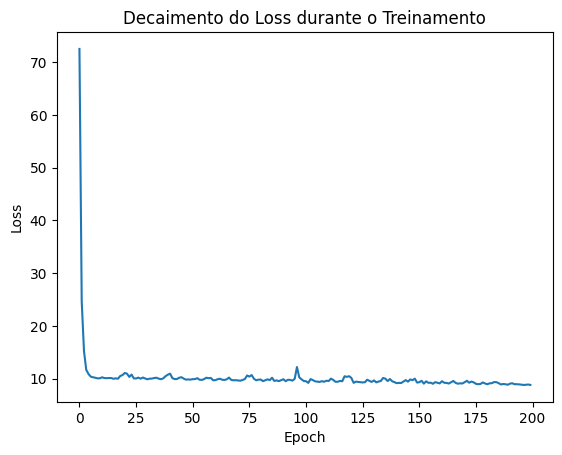

In [27]:
# Plotar o decaimento do loss ao longo das epochs
plt.plot(history.history['loss'])
plt.title('Decaimento do Loss durante o Treinamento')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [28]:
loss = model.evaluate(X_test, y_test)
loss

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.8222  


7.6808648109436035

In [29]:
predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


In [30]:
predictions

array([[53.42009 ],
       [38.21227 ],
       [28.334908],
       [59.3883  ],
       [69.58236 ],
       [49.72337 ],
       [38.012394],
       [39.15492 ],
       [38.441143],
       [46.682262],
       [57.4132  ],
       [44.545002],
       [39.789577],
       [54.883633],
       [33.986385],
       [53.28789 ],
       [43.599888],
       [54.30775 ],
       [55.139317],
       [43.931828],
       [53.06065 ],
       [39.29008 ],
       [48.509502],
       [42.70566 ],
       [48.378437],
       [38.25954 ],
       [37.462105],
       [42.19962 ],
       [53.5387  ],
       [45.59447 ],
       [55.89041 ],
       [33.981598],
       [50.29327 ],
       [58.593273],
       [38.723877],
       [53.26974 ]], dtype=float32)

In [42]:
y_pred = pd.DataFrame(predictions)
y_test = pd.DataFrame(y_test)

In [43]:
y_pred.index = y_test.index

In [44]:
df_combined = pd.concat([y_pred,y_test], axis=1)
df_combined.columns = ['y_pred', 'y_test']

In [45]:
df_combined['dif'] = (df_combined['y_pred'] - df_combined['y_test'])

In [46]:
df_combined.head(1)

,y_pred,y_test,dif
19,53.42009,58.4,-4.97991


In [47]:
mape = mean_absolute_percentage_error(df_combined['y_test'], df_combined['y_pred'])
print("Mean Absolute Percentage Error (MAPE):", mape*100)

# Calcular o R²
r2 = r2_score(df_combined['y_test'], df_combined['y_pred'])
print('R² =', r2)

Mean Absolute Percentage Error (MAPE): 7.680864998836609
R² = 0.7240724212462132


In [48]:
df_combined

,y_pred,y_test,dif
19,53.420090,58.4,-4.979910
45,38.212269,37.6,0.612269
139,28.334908,34.8,-6.465092
30,59.388302,49.2,10.188302
67,69.582359,66.0,3.582359
16,49.723370,54.0,-4.276630
119,38.012394,40.8,-2.787606
173,39.154919,37.2,1.954919
109,38.441143,36.8,1.641143
140,46.682262,45.2,1.482262


In [49]:
model.save('ANN_Physical.keras')